# CNN Architectures + Transfer Learning + Fine-tuning Comprehensive Review

In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import tensorflow as tf

2025-11-23 08:23:18.513313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763886198.734562      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763886198.796803      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train, x_val, y_train, y_val = train_test_split(   x_train, y_train, test_size=0.1, random_state=42)

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)


Train: (45000, 32, 32, 3)
Val: (5000, 32, 32, 3)
Test: (10000, 32, 32, 3)


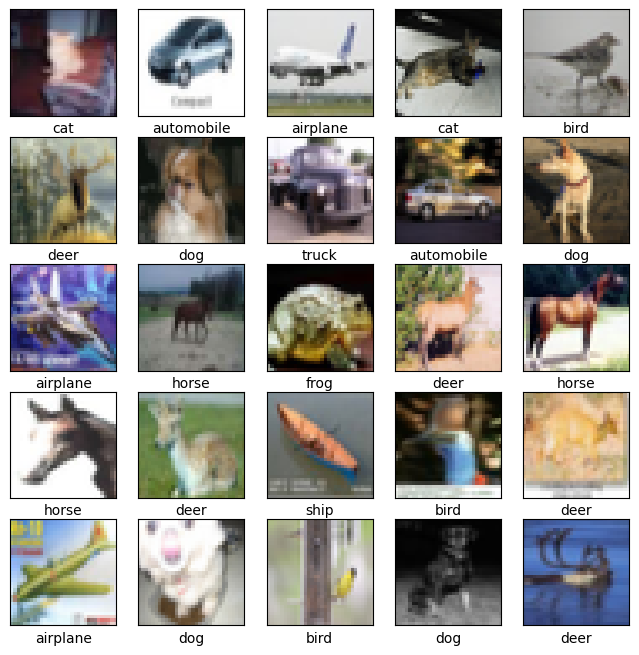

In [4]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
num_classes=len(class_names)
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [5]:
#data augmentaion
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


I0000 00:00:1763886224.323105      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763886224.323744      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [6]:

def plot_accuracy(hist):
    plt.figure(0)
    plt.plot(hist.history['accuracy'], label='training accuracy')
    plt.plot(hist.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


In [7]:
def plot_loss(hist):
    plt.plot(hist.history['loss'], label='training loss')
    plt.plot(hist.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Trying Different Models FT and TL

## LNet model
the L-Net model cant be fine tuned becase its normal cnn arch (built by us)

In [8]:

LNeTModel=tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(6,(5,5),activation='tanh',input_shape=x_train.shape[1:]),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(16,(5,5),activation='tanh'),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(120, (5,5), activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
   
])

In [9]:
LNeTModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ ?                      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ ?                      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
LNeTModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
Lnet_history=LNeTModel.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20)

Epoch 1/20


I0000 00:00:1763733851.622789     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2972 - loss: 1.9459 - val_accuracy: 0.3742 - val_loss: 1.7595
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3976 - loss: 1.6881 - val_accuracy: 0.4438 - val_loss: 1.5768
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4396 - loss: 1.5781 - val_accuracy: 0.4772 - val_loss: 1.4857
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4653 - loss: 1.5012 - val_accuracy: 0.4790 - val_loss: 1.4562
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4831 - loss: 1.4546 - val_accuracy: 0.4872 - val_loss: 1.4243
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4957 - loss: 1.4225 - val_accuracy: 0.4958 - val_loss: 1.4069
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4995 - loss: 1.4012 - val_accuracy: 0.4960 - val_loss: 1.4165
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5123 - loss: 1.3706 - val_accura

In [17]:
LNeTModel.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5404 - loss: 1.2724


[1.283050298690796, 0.5410000085830688]

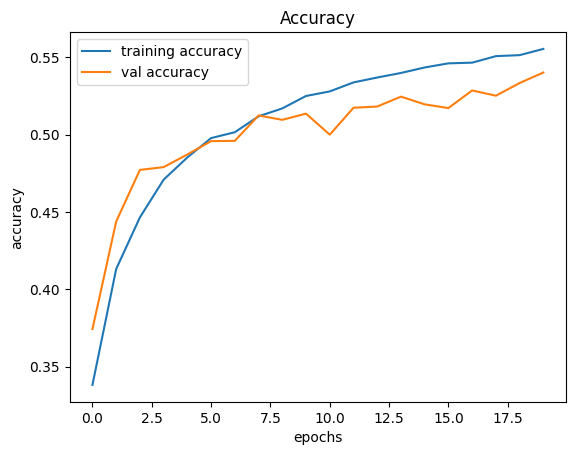

In [18]:
plot_accuracy(Lnet_history)

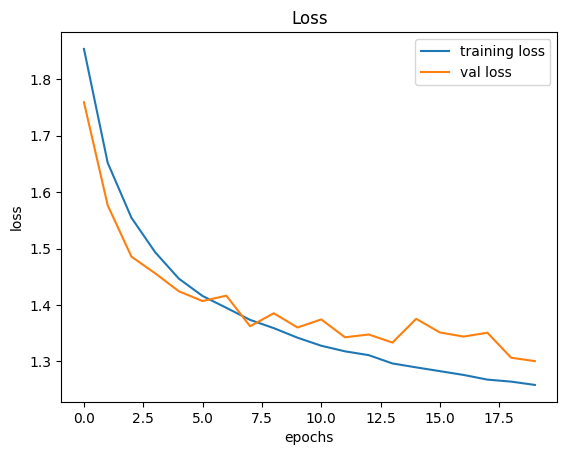

In [19]:
plot_loss(Lnet_history)

## VGG19

#### Transfer  Learning

In [10]:

base_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

base_model.trainable = False


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
inputs = tf.keras.layers.Input(shape=(32,32,3)) #the original images size

# Resize for ImageNet models
x = tf.keras.layers.Resizing(224,224)(inputs) ## recized t0 224^2 becasue vgg takes 224,224
x = tf.keras.applications.vgg19.preprocess_input(x)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
outputs =tf.keras.layers.Dense(10, activation="softmax")(x)

vggFTmodel = tf.keras.Model(inputs, outputs)

vggFTmodel.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing (Resizing) │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ resizing[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ resizing[0][0]    │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ resizing[0][0]    │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 7, 7, 512) │ 20,024,384 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg19[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      2,570 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,158,282 (76.90 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [37]:
vggFTmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [39]:
vgg_history= vggFTmodel.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
)
#it may be fit(x_train, y_train, validation_split=0.1) as validation data 

Epoch 1/10


I0000 00:00:1763736824.268833     113 service.cc:148] XLA service 0x7f764c12d2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763736824.269495     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763736824.269521     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763736838.574700     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 406s 278ms/step - accuracy: 0.1006 - loss: 2.3359 - val_accuracy: 0.1008 - val_loss: 2.3078
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.1035 - loss: 2.3107 - val_accuracy: 0.0970 - val_loss: 2.3026
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.0992 - loss: 2.3029 - val_accuracy: 0.1018 - val_loss: 2.3025
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.0956 - loss: 2.3028 - val_accuracy: 0.1006 - val_loss: 2.3026
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.0974 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.0

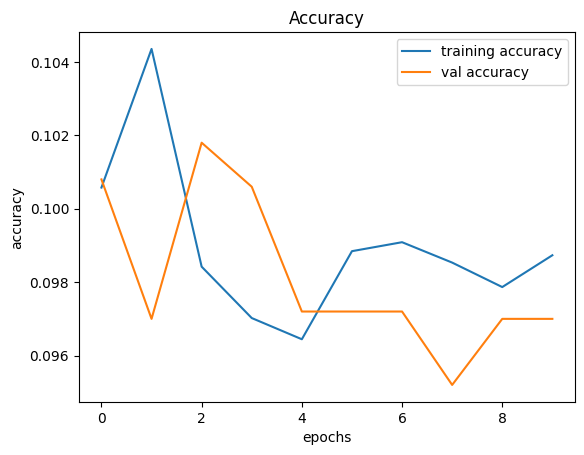

In [40]:
plot_accuracy(vgg_history)

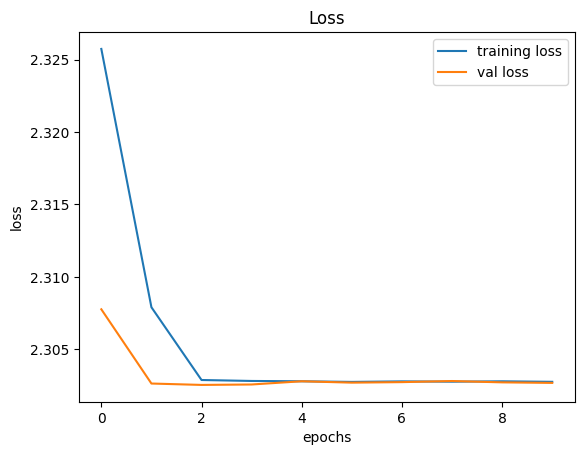

In [41]:
plot_loss(vgg_history)

#### fine Teuning 

In [14]:
base_model.trainable=True
#freez the 100 layer of vgg
for layer in base_model.layers[:100]:
    layer.trainable=False

In [15]:
vggFTmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
vgg_hist2=vggFTmodel.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10


I0000 00:00:1763855560.643245     113 service.cc:148] XLA service 0x7f67d8005c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763855560.643895     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763855560.643913     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763855561.030672     113 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763855575.739874     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 405s 276ms/step - accuracy: 0.0987 - loss: 2.3681 - val_accuracy: 0.0992 - val_loss: 2.3104
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 379s 270ms/step - accuracy: 0.1025 - loss: 2.3104 - val_accuracy: 0.1008 - val_loss: 2.3031
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 379s 270ms/step - accuracy: 0.1018 - loss: 2.3035 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 379s 269ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 379s 270ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 379s 270ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.0981 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 380s 270ms/step - accuracy: 0.1

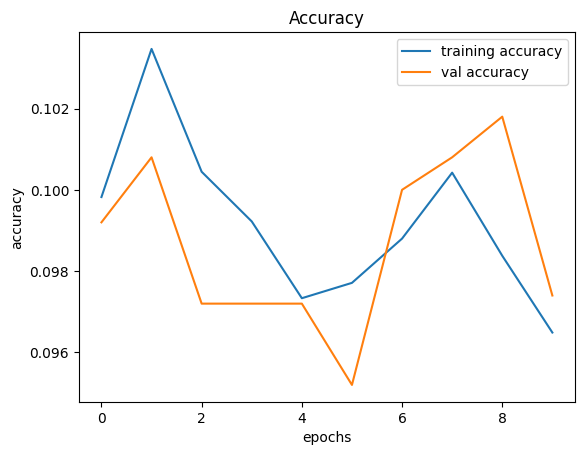

In [17]:
plot_accuracy(vgg_hist2)

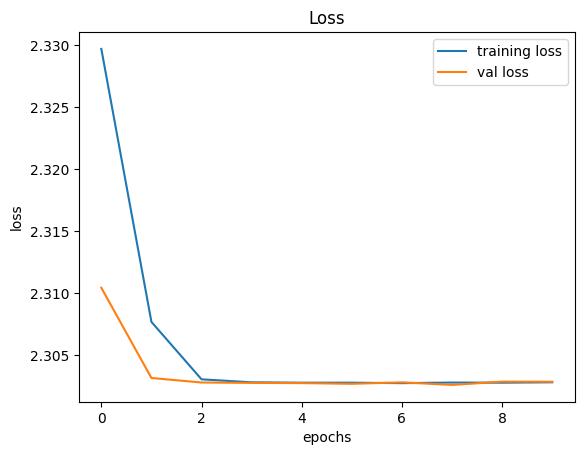

In [18]:
plot_loss(vgg_hist2)

In [20]:
tf.keras.applications.VGG19? #some data about vgg

Signature:
tf.keras.applications.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
    name='vgg19',
)
Docstring:
Instantiates the VGG19 model.

Reference:
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](
https://arxiv.org/abs/1409.1556) (ICLR 2015)

For image classification use cases, see
[this page for detailed examples](
  https://keras.io/api/applications/#usage-examples-for-image-classification-models).

For transfer learning use cases, make sure to read the
[guide to transfer learning & fine-tuning](
  https://keras.io/guides/transfer_learning/).

The default input size for this model is 224x224.

Note: each Keras Application expects a specific kind of input preprocessing.
For VGG19, call `keras.applications.vgg19.preprocess_input` on your
inputs before passing them to the model.
`vgg19.preprocess_input` will convert the input images from

## MobileNetV2

### TL

In [12]:
ase_mobile=tf.keras.applications.MobileNetV2?

Signature:
tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
    name=None,
)
Docstring:
Instantiates the MobileNetV2 architecture.

MobileNetV2 is very similar to the original MobileNet,
except that it uses inverted residual blocks with
bottlenecking features. It has a drastically lower
parameter count than the original MobileNet.
MobileNets support any input size greater
than 32 x 32, with larger image sizes
offering better performance.

Reference:
- [MobileNetV2: Inverted Residuals and Linear Bottlenecks](
    https://arxiv.org/abs/1801.04381) (CVPR 2018)

This function returns a Keras image classification model,
optionally loaded with weights pre-trained on ImageNet.

For image classification use cases, see
[this page for detailed examples](
  https://keras.io/api/applications/#usage-examples-for-image-classification-mod

In [26]:
base_mobile=tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet'
)
base_mobile.trainable=False

In [28]:
inputs = tf.keras.Input(shape=(32, 32,3)) #that will actually come for the model
x = tf.keras.layers.Resizing(224, 224)(inputs)
x = data_augmentation(x)
x= tf.keras.applications.mobilenet.preprocess_input(x)
x = base_mobile(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
mobile_model = tf.keras.Model(inputs, outputs)


In [29]:
mobile_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
mobHist_Tl=mobile_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.1113 - loss: 2.3235 - val_accuracy: 0.1422 - val_loss: 2.2851
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 56ms/step - accuracy: 0.1370 - loss: 2.2857 - val_accuracy: 0.1306 - val_loss: 2.2409
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.1582 - loss: 2.2537 - val_accuracy: 0.1706 - val_loss: 2.2049
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.1752 - loss: 2.2341 - val_accuracy: 0.2038 - val_loss: 2.1773
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 56ms/step - accuracy: 0.1893 - loss: 2.2059 - val_accuracy: 0.1368 - val_loss: 2.1884
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 56ms/step - accuracy: 0.1933 - loss: 2.1905 - val_accuracy: 0.2078 - val_loss: 2.1426
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 56ms/step - accuracy: 0.2103 - loss: 2.1717 - val_accuracy: 0.2386 - val_loss: 2.1427
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.2140 -

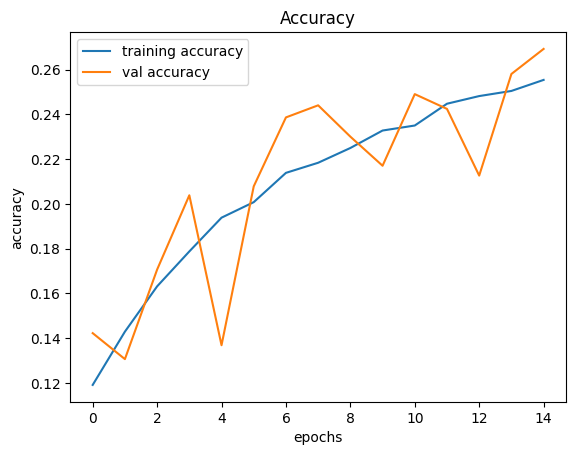

In [32]:
plot_accuracy(mobHist_Tl)

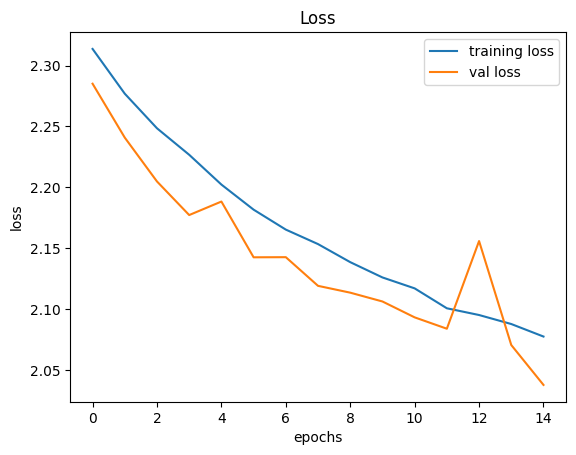

In [33]:
plot_loss(mobHist_Tl)

In [34]:
mobile_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.2684 - loss: 2.0394


[2.041808605194092, 0.26460000872612]

### fine tuninig 

In [35]:
base_mobile.trainable=True
for layer in base_mobile.layers[:100]:
    layer.trainable=False
    

In [36]:
mobile_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
mobileHistFt=mobile_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 93ms/step - accuracy: 0.2354 - loss: 3.0262 - val_accuracy: 0.1216 - val_loss: 13.5582
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.3734 - loss: 1.7441 - val_accuracy: 0.1000 - val_loss: 5.1345
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.3945 - loss: 1.6784 - val_accuracy: 0.0972 - val_loss: 29.7498
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.4150 - loss: 1.6303 - val_accuracy: 0.1116 - val_loss: 17.2308
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 129s 91ms/step - accuracy: 0.4291 - loss: 1.5948 - val_accuracy: 0.0974 - val_loss: 14.6669
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.4435 - loss: 1.5602 - val_accuracy: 0.1268 - val_loss: 11.7245
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.4255 - loss: 1.6323 - val_accuracy: 0.0972 - val_loss: 11.3972
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accu

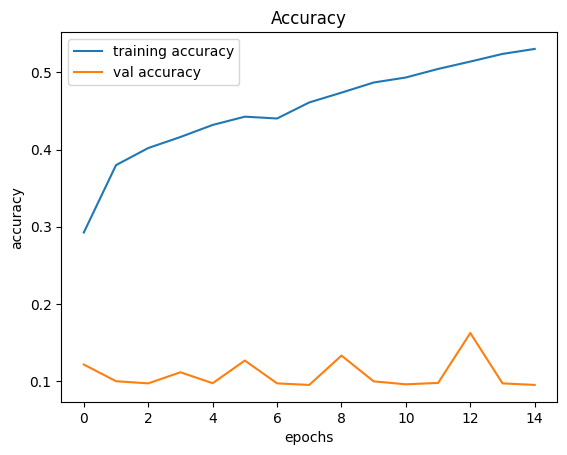

In [40]:
plot_accuracy(mobileHistFt)

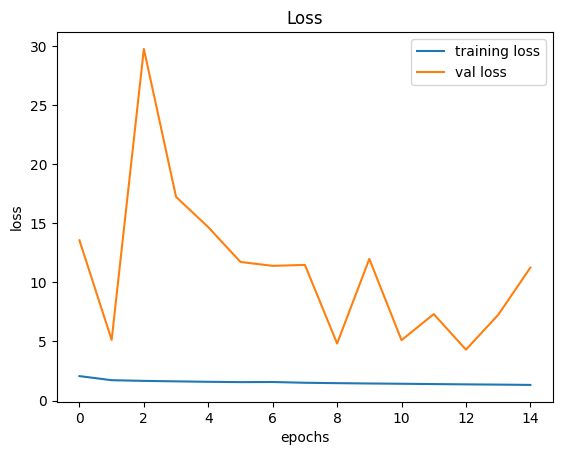

In [41]:
plot_loss(mobileHistFt)

In [43]:
mobile_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.1001 - loss: 11.3249


[11.280085563659668, 0.10000000149011612]

# EfficientNetB0

### Transfer Learning 

In [45]:
base_eff=tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet'
)
base_eff.trainable=False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [49]:
inputs=tf.keras.Input(shape=(32,32,3))
x=tf.keras.layers.Resizing(224,224)(inputs)
x=data_augmentation(x)
x=tf.keras.applications.efficientnet.preprocess_input(x)
x=base_eff(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
eff_model = tf.keras.Model(inputs, outputs)

In [50]:
eff_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
eff_Tl_hist=eff_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

Epoch 1/15


E0000 00:00:1763893594.022168      48 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 120s 78ms/step - accuracy: 0.1002 - loss: 2.3289 - val_accuracy: 0.1008 - val_loss: 2.3230
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.1006 - loss: 2.3285 - val_accuracy: 0.1008 - val_loss: 2.3228
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.0994 - loss: 2.3284 - val_accuracy: 0.1008 - val_loss: 2.3322
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.0961 - loss: 2.3304 - val_accuracy: 0.0972 - val_loss: 2.3248
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.0990 - loss: 2.3278 - val_accuracy: 0.0952 - val_loss: 2.3169
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.1028 - loss: 2.3236 - val_accuracy: 0.1046 - val_loss: 2.3111
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.1017 - loss: 2.3257 - val_accuracy: 0.1000 - val_loss: 2.3243
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.1030 - lo

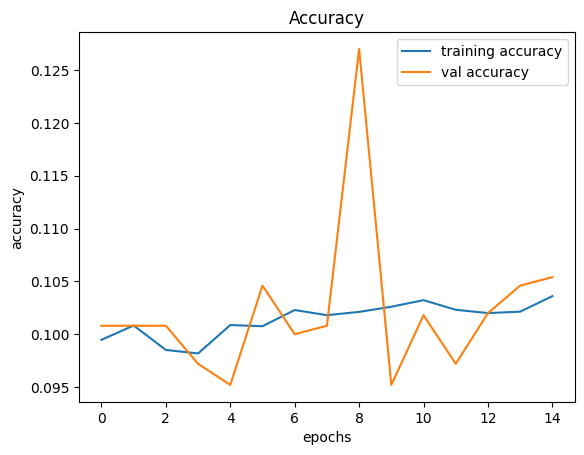

In [53]:
plot_accuracy(eff_Tl_hist)

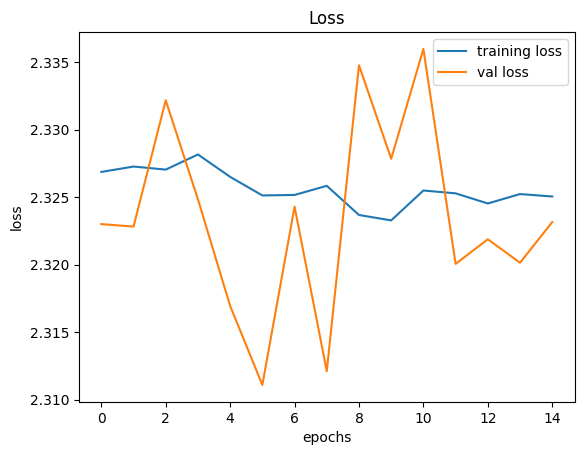

In [54]:
plot_loss(eff_Tl_hist)

### fine tuning

In [55]:
base_eff.trainable=True
for layer in base_eff.layers[:100]: ## freez first 100 layer
    layer.trainable=False
    

In [56]:
eff_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
eff_FT_hist=eff_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

Epoch 1/15


E0000 00:00:1763897460.670579      48 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 157ms/step - accuracy: 0.3397 - loss: 1.7946 - val_accuracy: 0.4544 - val_loss: 1.5233
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.6284 - loss: 1.0646 - val_accuracy: 0.5906 - val_loss: 1.2612
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.6997 - loss: 0.8608 - val_accuracy: 0.7190 - val_loss: 0.8000
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.7346 - loss: 0.7582 - val_accuracy: 0.7132 - val_loss: 0.8221
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.7606 - loss: 0.6938 - val_accuracy: 0.7244 - val_loss: 0.7959
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.7838 - loss: 0.6225 - val_accuracy: 0.7388 - val_loss: 0.7511
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.7964 - loss: 0.5833 - val_accuracy: 0.7210 - val_loss: 0.8588
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.8

# ٌResNet50

In [58]:
base_res=tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet'
)
base_res.trainaable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [59]:
inputs=tf.keras.Input(shape=(32,32,3))
x=tf.keras.layers.Resizing(224,224)(inputs)
x=data_augmentation(x)
x=tf.keras.applications.resnet50.preprocess_input(x)
x=base_res(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
resnet_model = tf.keras.Model(inputs, outputs)

In [60]:
resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
resnetTLhist=eff_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 219s 155ms/step - accuracy: 0.8817 - loss: 0.3334 - val_accuracy: 0.8158 - val_loss: 0.5784
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.8907 - loss: 0.3171 - val_accuracy: 0.6528 - val_loss: 1.2245
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8174 - val_loss: 0.5507
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.8998 - loss: 0.2833 - val_accuracy: 0.8588 - val_loss: 0.4583
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.9068 - loss: 0.2706 - val_accuracy: 0.8438 - val_loss: 0.4987
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 218s 155ms/step - accuracy: 0.9121 - loss: 0.2560 - val_accuracy: 0.7070 - val_loss: 0.9351
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 219s 155ms/step - accuracy: 0.9105 - loss: 0.2553 - val_accuracy: 0.8270 - val_loss: 0.5371
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 219s 155ms/step - ac

In [1]:
resnetTLhist.evaluate(x_test.y_test)

NameError: name 'resnetTLhist' is not defined